In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# 1. Veriyi yükle
digits = datasets.load_digits()



In [3]:
# 2. Veri setinin genel yapısı
print(f"Veri seti boyutu (gözlem sayısı, özellik sayısı): {digits.data.shape}")
print(f"Etiketler: {np.unique(digits.target)}")


Veri seti boyutu (gözlem sayısı, özellik sayısı): (1797, 64)
Etiketler: [0 1 2 3 4 5 6 7 8 9]


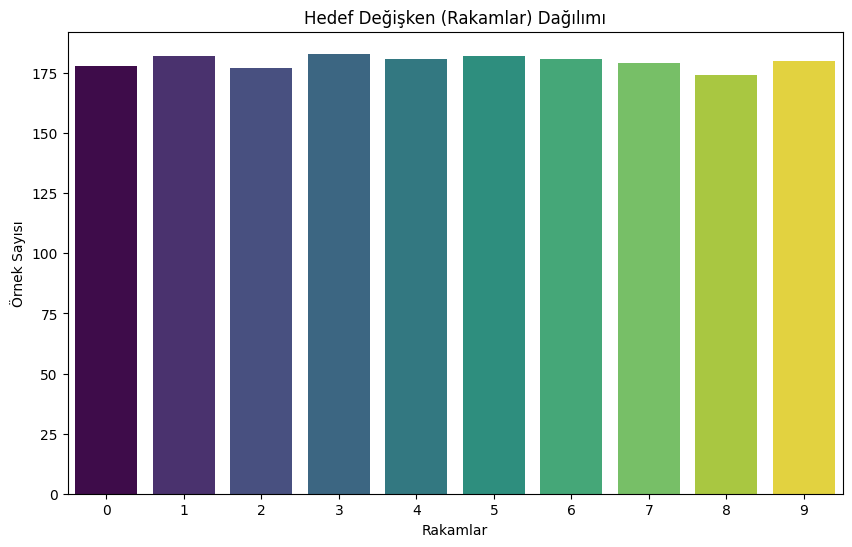

In [4]:
# 3. Hedef değişkenin dağılımı (0-9 arası rakamlar)
plt.figure(figsize=(10, 6))
sns.countplot(x=digits.target, hue=digits.target, palette='viridis', legend=False)
plt.title("Hedef Değişken (Rakamlar) Dağılımı")
plt.xlabel("Rakamlar")
plt.ylabel("Örnek Sayısı")
plt.show()


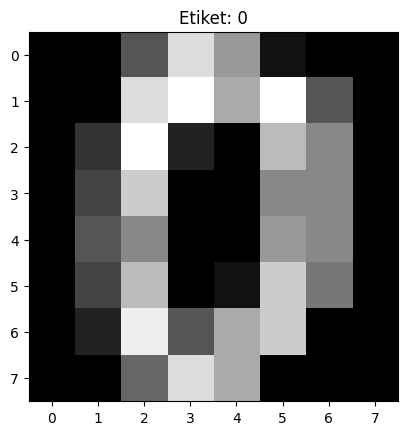

In [5]:
# Verilere erişim
X = digits.data  # Özellikler (feature) matris
y = digits.target  # Etiketler (labels)

# İlk örneği görselleştirin
plt.imshow(X[0].reshape(8, 8), cmap='gray')
plt.title(f'Etiket: {y[0]}')
plt.show()

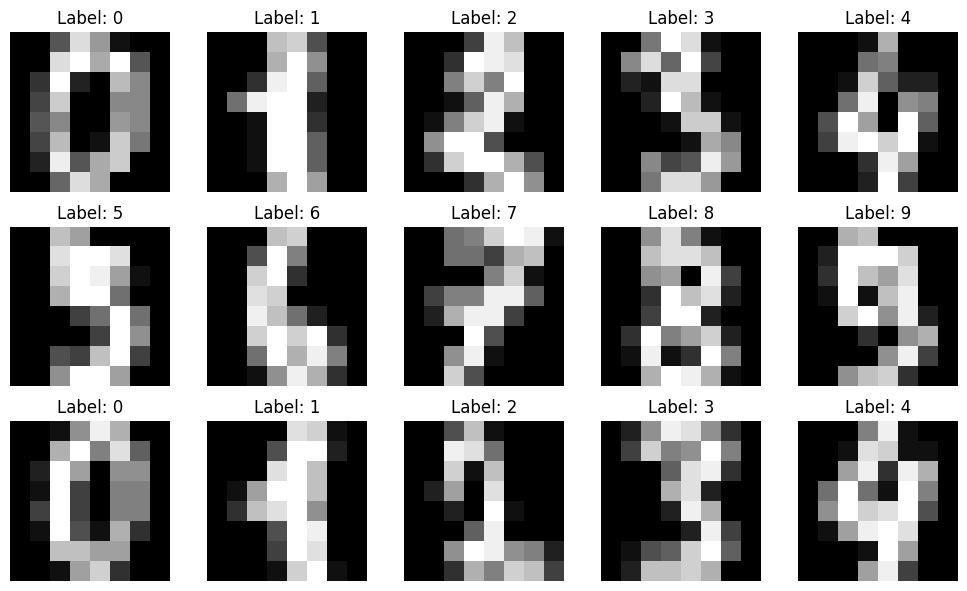

In [6]:
# 4. Rakam örneklerinin görselleştirilmesi (örnek görüntüler)
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()



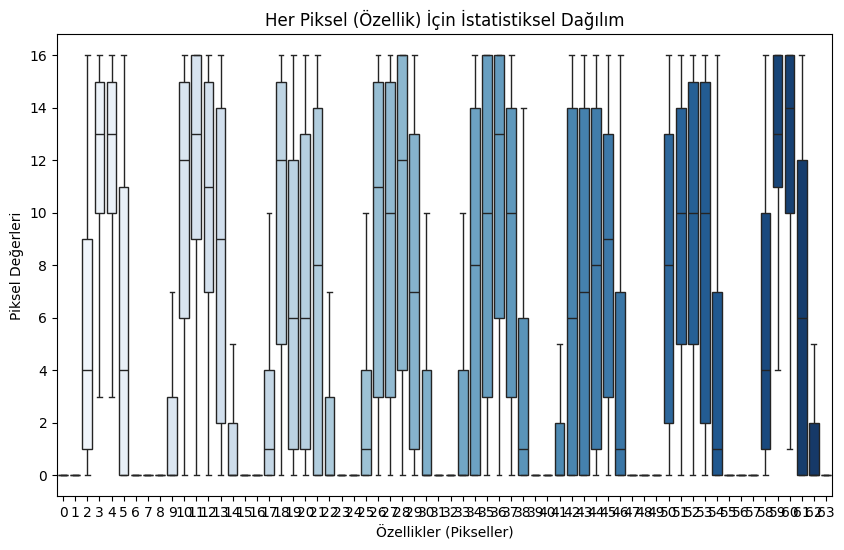

In [7]:
# 5. Her bir pikselin istatistiksel dağılımı
plt.figure(figsize=(10, 6))
sns.boxplot(data=digits.data, palette='Blues', showfliers=False)
plt.title("Her Piksel (Özellik) İçin İstatistiksel Dağılım")
plt.xlabel("Özellikler (Pikseller)")
plt.ylabel("Piksel Değerleri")
plt.show()

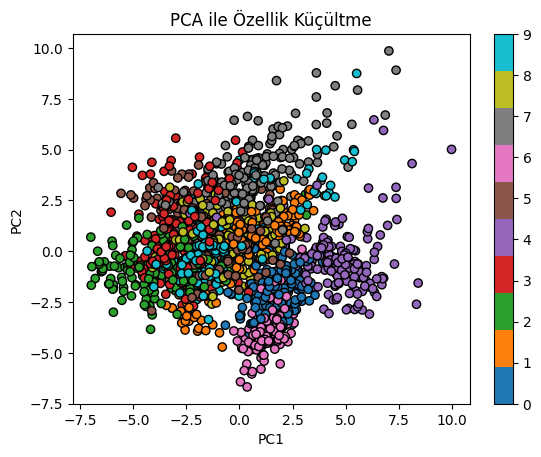

In [8]:
#veri küçültme

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', edgecolor='k')
plt.colorbar()
plt.title('PCA ile Özellik Küçültme')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


## Model Oluşturma

In [9]:
n = len(digits.images)
veri = digits.images.reshape((n, -1))

In [10]:
#verisetini test ve train verileri olarak ayırma %20 test %80 train
n = len(digits.images)
veri = digits.images.reshape((n, -1))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(veri, digits.target, test_size=0.2, random_state=99)

### SVM Modeli (Destek Vektör Makineleri)

In [11]:
from sklearn import svm
svm_modeli = svm.SVC(gamma=0.001, C=100.)
svm_modeli.fit(x_train, y_train)
y_pred = svm_modeli.predict(x_test) #test verisi ile tahmin etme

SVC(C=100.0, gamma=0.001)

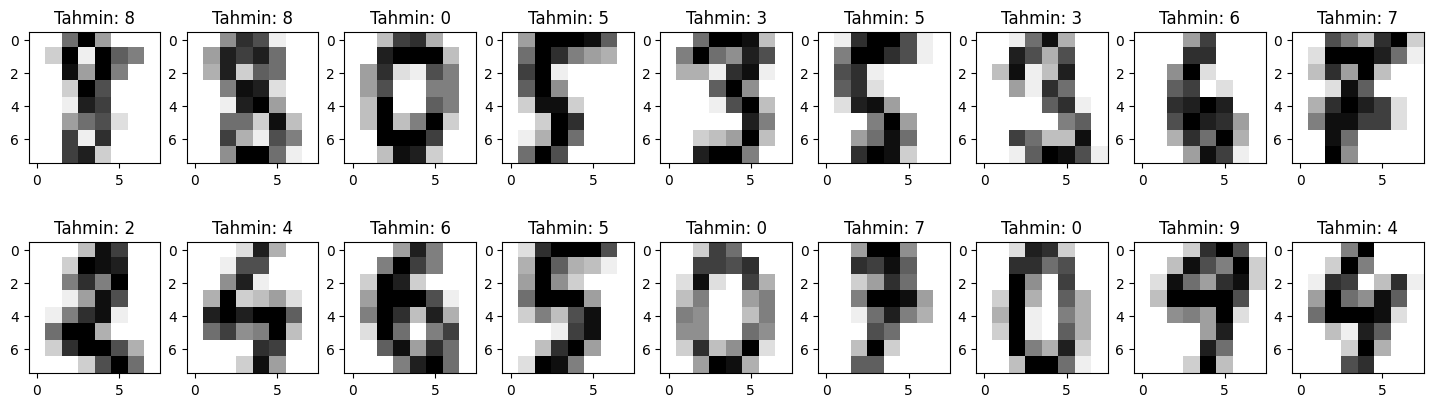

In [13]:
resim_tahminleri = list(zip(x_test,y_pred)) #tahmileri ve resimleri birleştirme

#görselleştirme işlemi
plt.figure(figsize=(18,5))
for index, (image, prediction) in enumerate(resim_tahminleri[:18]):
     plt.subplot(2, 9, index + 1)
     image = image.reshape(8, 8)
     plt.imshow(image, cmap=plt.cm.gray_r)
     plt.title('Tahmin: %i' % prediction)


In [14]:
#svm modelinin doğruluk oranı
svm_dogruluk = svm_modeli.score(x_test, y_test)
svm_dogruluk

0.9916666666666667

### KNN Modeli - (K-En Yakın Komşu) 

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_modeli = KNeighborsClassifier(n_neighbors=5)
knn_modeli.fit(x_train, y_train)
y_pred = knn_modeli.predict(x_test)

KNeighborsClassifier()

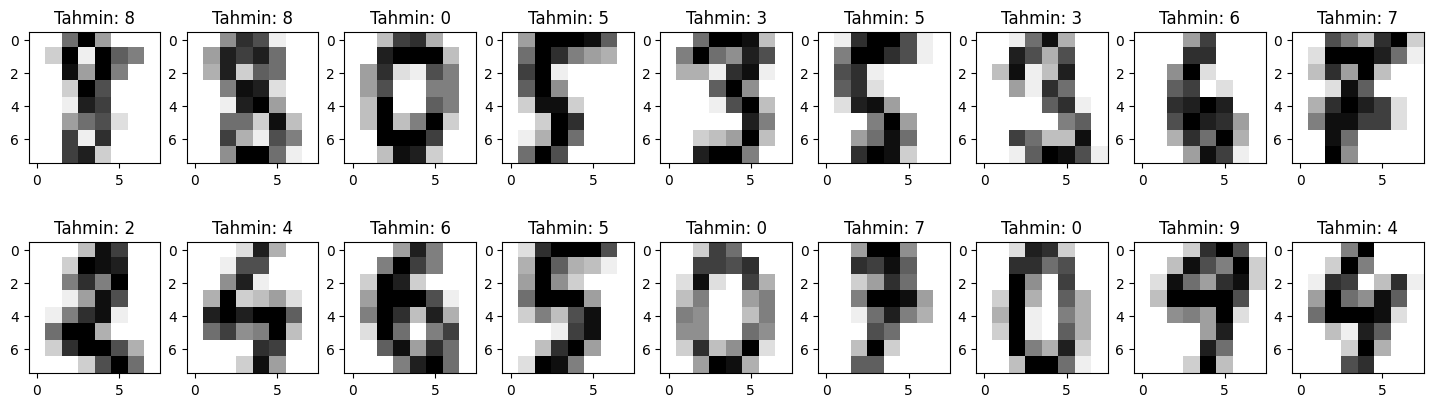

In [17]:
resim_tahminleri = list(zip(x_test,y_pred))

plt.figure(figsize=(18,5))
for index, (image, prediction) in enumerate(resim_tahminleri[:18]):
     plt.subplot(2, 9, index + 1)
     image = image.reshape(8, 8)
     plt.imshow(image, cmap=plt.cm.gray_r)
     plt.title('Tahmin: %i' % prediction)


In [18]:
#knn modelinin doğruluk oranı
knn_dogruluk = knn_modeli.score(x_test, y_test)
knn_dogruluk

0.9944444444444445

### MLP Modeli - (Çok Katmanlı Algılayıcı)
#### Sadece 2-2 gizli katmanlı

In [19]:
from sklearn.neural_network import MLPClassifier

#katman sayısının etkisini anlamak için sadece 2'şer nöronlu 2 gizli katman eklendi
mlp_modeli = MLPClassifier(hidden_layer_sizes=(2,2), max_iter=10000)
mlp_modeli.fit(x_train, y_train)
y_pred = mlp_modeli.predict(x_test)

MLPClassifier(hidden_layer_sizes=(2, 2), max_iter=10000)

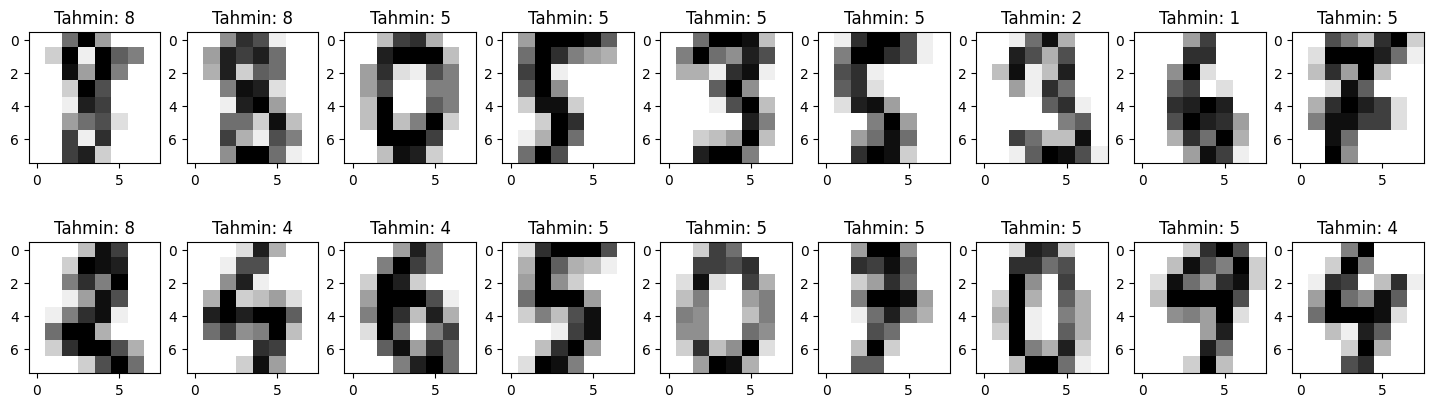

In [21]:
resim_tahminleri = list(zip(x_test,y_pred))

plt.figure(figsize=(18,5))
for index, (image, prediction) in enumerate(resim_tahminleri[:18]):
     plt.subplot(2, 9, index + 1)
     image = image.reshape(8, 8)
     plt.imshow(image, cmap=plt.cm.gray_r)
     plt.title('Tahmin: %i' % prediction)


In [22]:
#az katman sayısı ile doğruluk oranı büyük ölçüde düştü
mlp_dogruluk = mlp_modeli.score(x_test, y_test)
mlp_dogruluk

0.2916666666666667

### MLP Modeli 
#### 100-80 gizli katmanlı

In [23]:
#50'şer nöronlu 50 gizli katman eklendi
mlp_modeli2 = MLPClassifier(
    hidden_layer_sizes=(100, 80),  # 2 gizli katman: ilkinde 100, ikincisinde 80 nöron
    activation='relu',             # ReLU aktivasyon fonksiyonu
    solver='adam',                 # Adam optimizasyon algoritması
    learning_rate_init=0.0001,      # Başlangıç öğrenme oranı
    max_iter=100000                 # Maksimum iterasyon sayısı
)
mlp_modeli2.fit(x_train, y_train)
y_pred2 = mlp_modeli2.predict(x_test)

MLPClassifier(hidden_layer_sizes=(100, 80), learning_rate_init=0.0001,
              max_iter=100000)

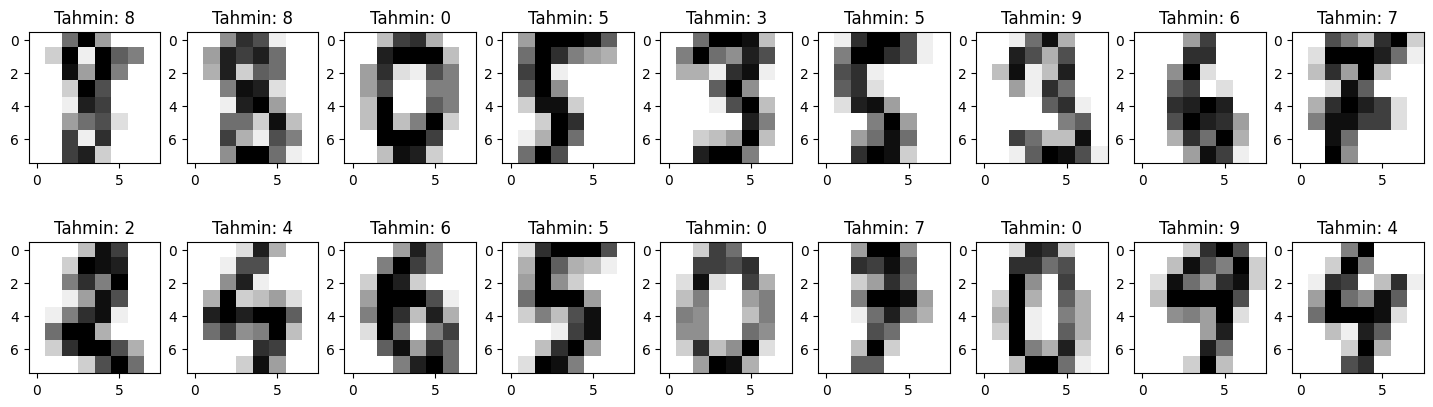

In [25]:
resim_tahminleri = list(zip(x_test,y_pred2))

plt.figure(figsize=(18,5))
for index, (image, prediction) in enumerate(resim_tahminleri[:18]):
     plt.subplot(2, 9, index + 1)
     image = image.reshape(8, 8)
     plt.imshow(image, cmap=plt.cm.gray_r)
     plt.title('Tahmin: %i' % prediction)

In [26]:
#gizli katman sayısı artırıldığında doğruluk oranı da büyük ölçüde arttı
mlp_dogruluk2 = mlp_modeli2.score(x_test, y_test)
mlp_dogruluk2

0.9805555555555555

### MLP Modelinin Karışıklık Matrisi 

<Axes: title={'center': 'Confusion (Karışıklık) Matrisi'}, xlabel='Tahmin', ylabel='Gerçek Değer'>

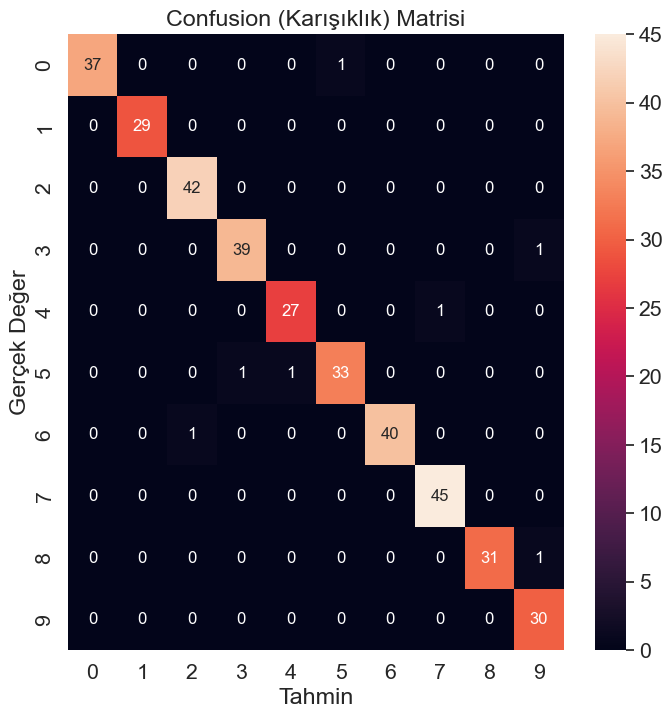

In [27]:
#tahminlerin tutrarlılığını ölçmek için karmaşıklık matrisi
from sklearn.metrics import confusion_matrix

data = confusion_matrix(y_test, y_pred2)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Gerçek Değer'
df_cm.columns.name = 'Tahmin' 
plt.figure(figsize = (8,8))
sns.set(font_scale=1.4)
plt.title('Confusion (Karışıklık) Matrisi')
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12})